<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection using Scikit-Learn**

we will use a real dataset to train each of these models. The dataset includes information about transactions made by credit cards in September 2013 by European cardholders. You will use the trained model to assess if a credit card transaction is legitimate or not.

<p>Import libraries<p>

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

Import the data from github link

In [ ]:
import pandas as pd
link='https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv'
df=pd.read_csv(link)
df.head(15)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Divide th Data Input and Target

In [ ]:
X=df.drop(['Class'], axis=1)
y=df['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
sns.set()
cols=X.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

Check for outliers in the V1 column

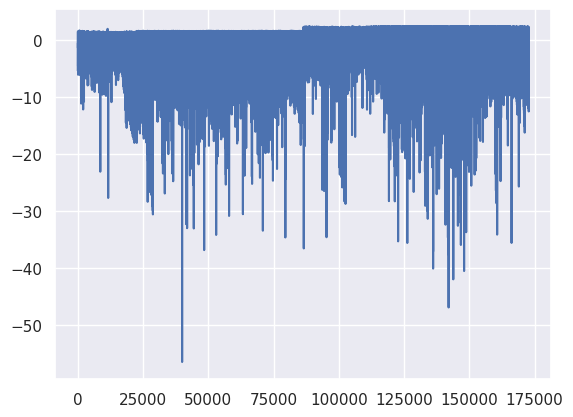

In [ ]:
plt.plot(df['Time'],df['V1'])

we found that there are some out liers which are lesser than -50. so i wanna remove them

In [ ]:
out=df[df['V1']<-50]
out

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
39769,39954.0,-56.40751,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.5013,6.967698,...,-6.266878,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,1201.83,0


In [ ]:
df2=df.copy()
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Removing the outlier

In [ ]:
df2=df2.drop([39769])
df2.shape

(284806, 31)

I cannot go through all the columns and hardcode it. So will loop them in for loop to see the outliers

In [ ]:
cols=cols[2:-1]
cols

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

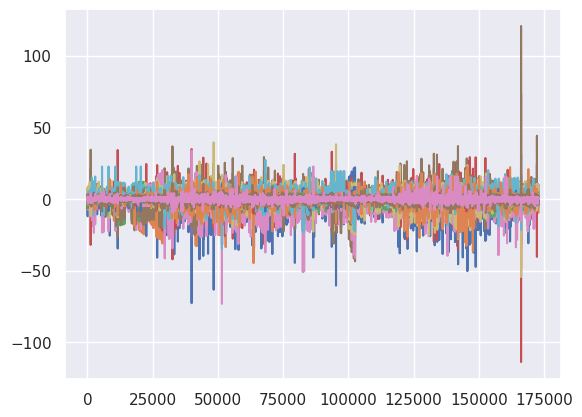

In [ ]:
for col in cols:
  plt.plot(df['Time'],df[col])


we found some values are too higher than other so will remove them by running a for loop

In [ ]:
for col in cols:
    df2 = df2[~((df2[col] < -50) | (df2[col] > 50))]

In [ ]:
df2.shape

(284798, 31)

Check again how the data looks like after removing outliers.Now its looking good.

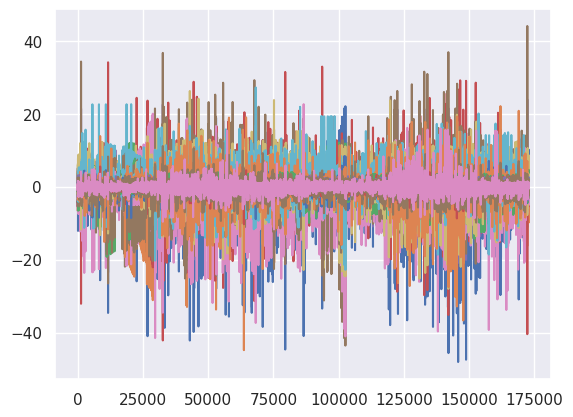

In [ ]:
for col in cols:
  plt.plot(df2['Time'],df2[col])

check for Data Imbalance...!
It seems like there is huge Data Imbalance in our data set.
Now we need to handel it

In [ ]:
df2.Class.value_counts()

0    284306
1       492
Name: Class, dtype: int64

Divide our data into two separate classes based on Class

In [ ]:
majorty_samples,minority_samples=df2.Class.value_counts()
majorty_samples,minority_samples

(284306, 492)

In [ ]:
majorty_class=df2[df2['Class']==0]
minority_class=df2[df2['Class']==1]

Use SMOTE to over sample the minority class Data

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
xsmt,ysmt=smote.fit_resample((df2.drop(['Class'],axis='columns')),df2.Class)


In [ ]:
xsmt.shape,ysmt.shape

((568612, 30), (568612,))

now the data is balanced

In [ ]:
ysmt.value_counts()

0    284306
1    284306
Name: Class, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

Define funcion to create modeland generating accuracy_score, Classification report and confusion matrix

In [ ]:
def model(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  rfc=RandomForestClassifier()
  rfc.fit(X_train,y_train)
  ypred=rfc.predict(X_test)
  return accuracy_score(y_test,ypred),classification_report(y_test,ypred),confusion_matrix(y_test,ypred)


I wanna check our model performance on both Imbanced Data and Balanced.
First check the model performance on Imbanced Data

In [ ]:
ac,cr,cm=model(df.drop(['Class'],axis='columns'),df.Class)

Accuracy is pretty good, but in the feild of finance there will be only very few fraud transactions will happen like 1 in thousands.If our model not able detect that one transaction there is use.

In [ ]:
ac

0.9995962220427653

precision and accuracy are good and we need to improve recall and f1_score

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



out model 22 fake transactions as fair its good i think

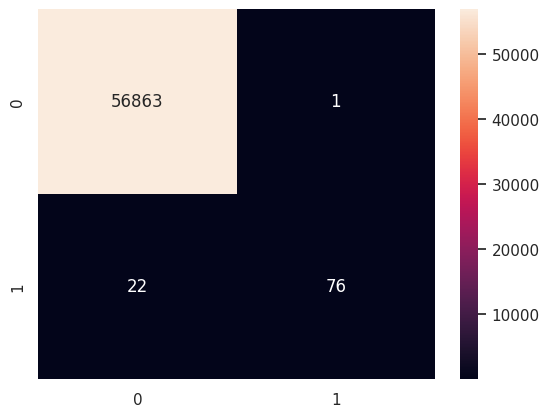

In [ ]:
ax = sns.heatmap(cm, annot=True, fmt='d', )
plt.show(ax)

<h1>Now run the model on Balanced Data<h1>

In [ ]:
ac_processed,cr_processed,cm_processed=model(xsmt,ysmt)

there is an improvement in accuracy

In [ ]:
ac_processed

0.9998944804481064

upon comparing both models, model generated very high precission results on Balanced data than Imbalanced data

In [ ]:
print(cr_processed)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56580
           1       1.00      1.00      1.00     57143

    accuracy                           1.00    113723
   macro avg       1.00      1.00      1.00    113723
weighted avg       1.00      1.00      1.00    113723



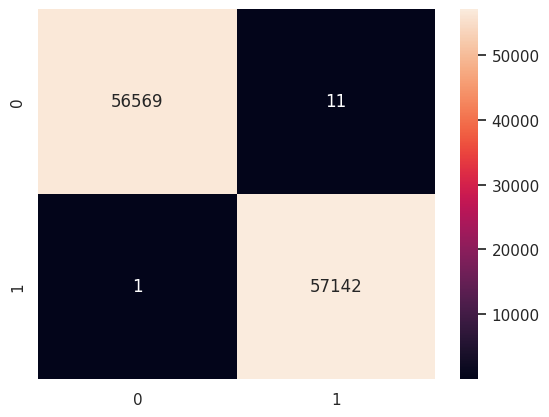

In [ ]:
ax = sns.heatmap(cm_processed, annot=True, fmt='d', )
plt.show(ax)